In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load dataset
df = pd.read_csv("Housing.csv")

In [4]:
# Encode categorical features (yes/no -> 1/0)
cat_features = ["mainroad","guestroom","basement","hotwaterheating","airconditioning"]
for col in cat_features:
    df[col] = df[col].map({"yes":1, "no":0})

In [5]:
# Features and target
features = ["area","bedrooms","bathrooms","stories"] + cat_features
X = df[features]
y = df["price"]

In [6]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# --------- MODEL 1: Linear Regression ---------
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# --------- MODEL 2: Random Forest Regressor ---------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [8]:
# Evaluate models
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Random Forest R2:", r2_score(y_test, rf_pred))

Linear Regression MSE: 1997147293758.538
Random Forest MSE: 2238702411968.6733
Linear Regression R2: 0.6048828690833074
Random Forest R2: 0.5570934218233545


VISUALIZATIONS

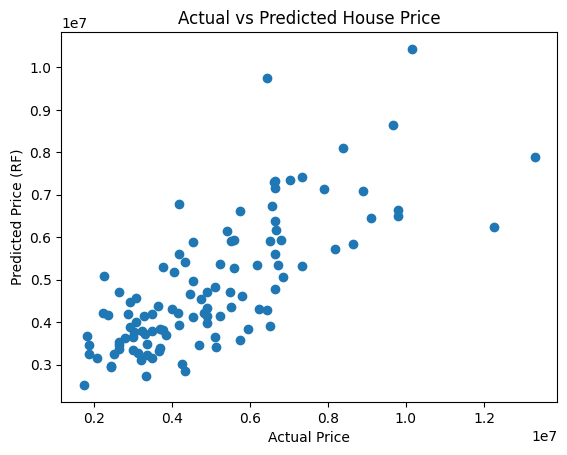

In [10]:
# Scatter plot: Actual vs Predicted
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (RF)")
plt.title("Actual vs Predicted House Price")
plt.show()

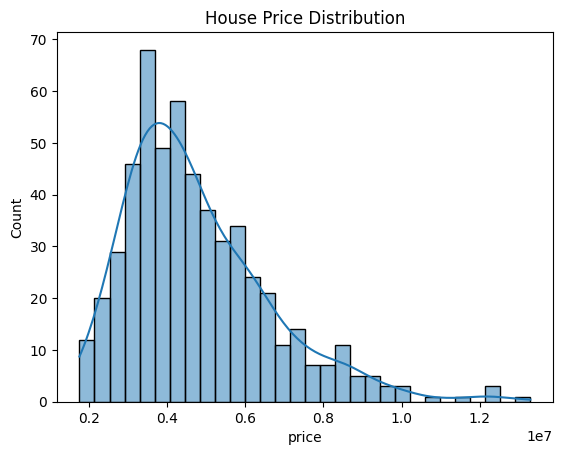

In [11]:
# Histogram of house prices
sns.histplot(df["price"], bins=30, kde=True)
plt.title("House Price Distribution")
plt.show()

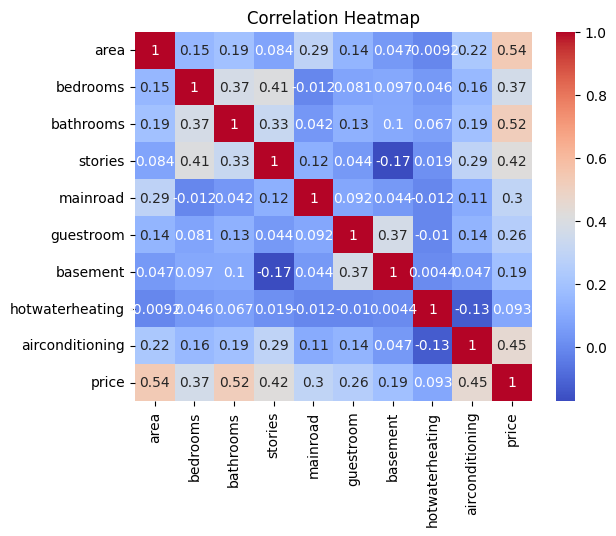

In [12]:
# Heatmap of correlations
sns.heatmap(df[features + ["price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

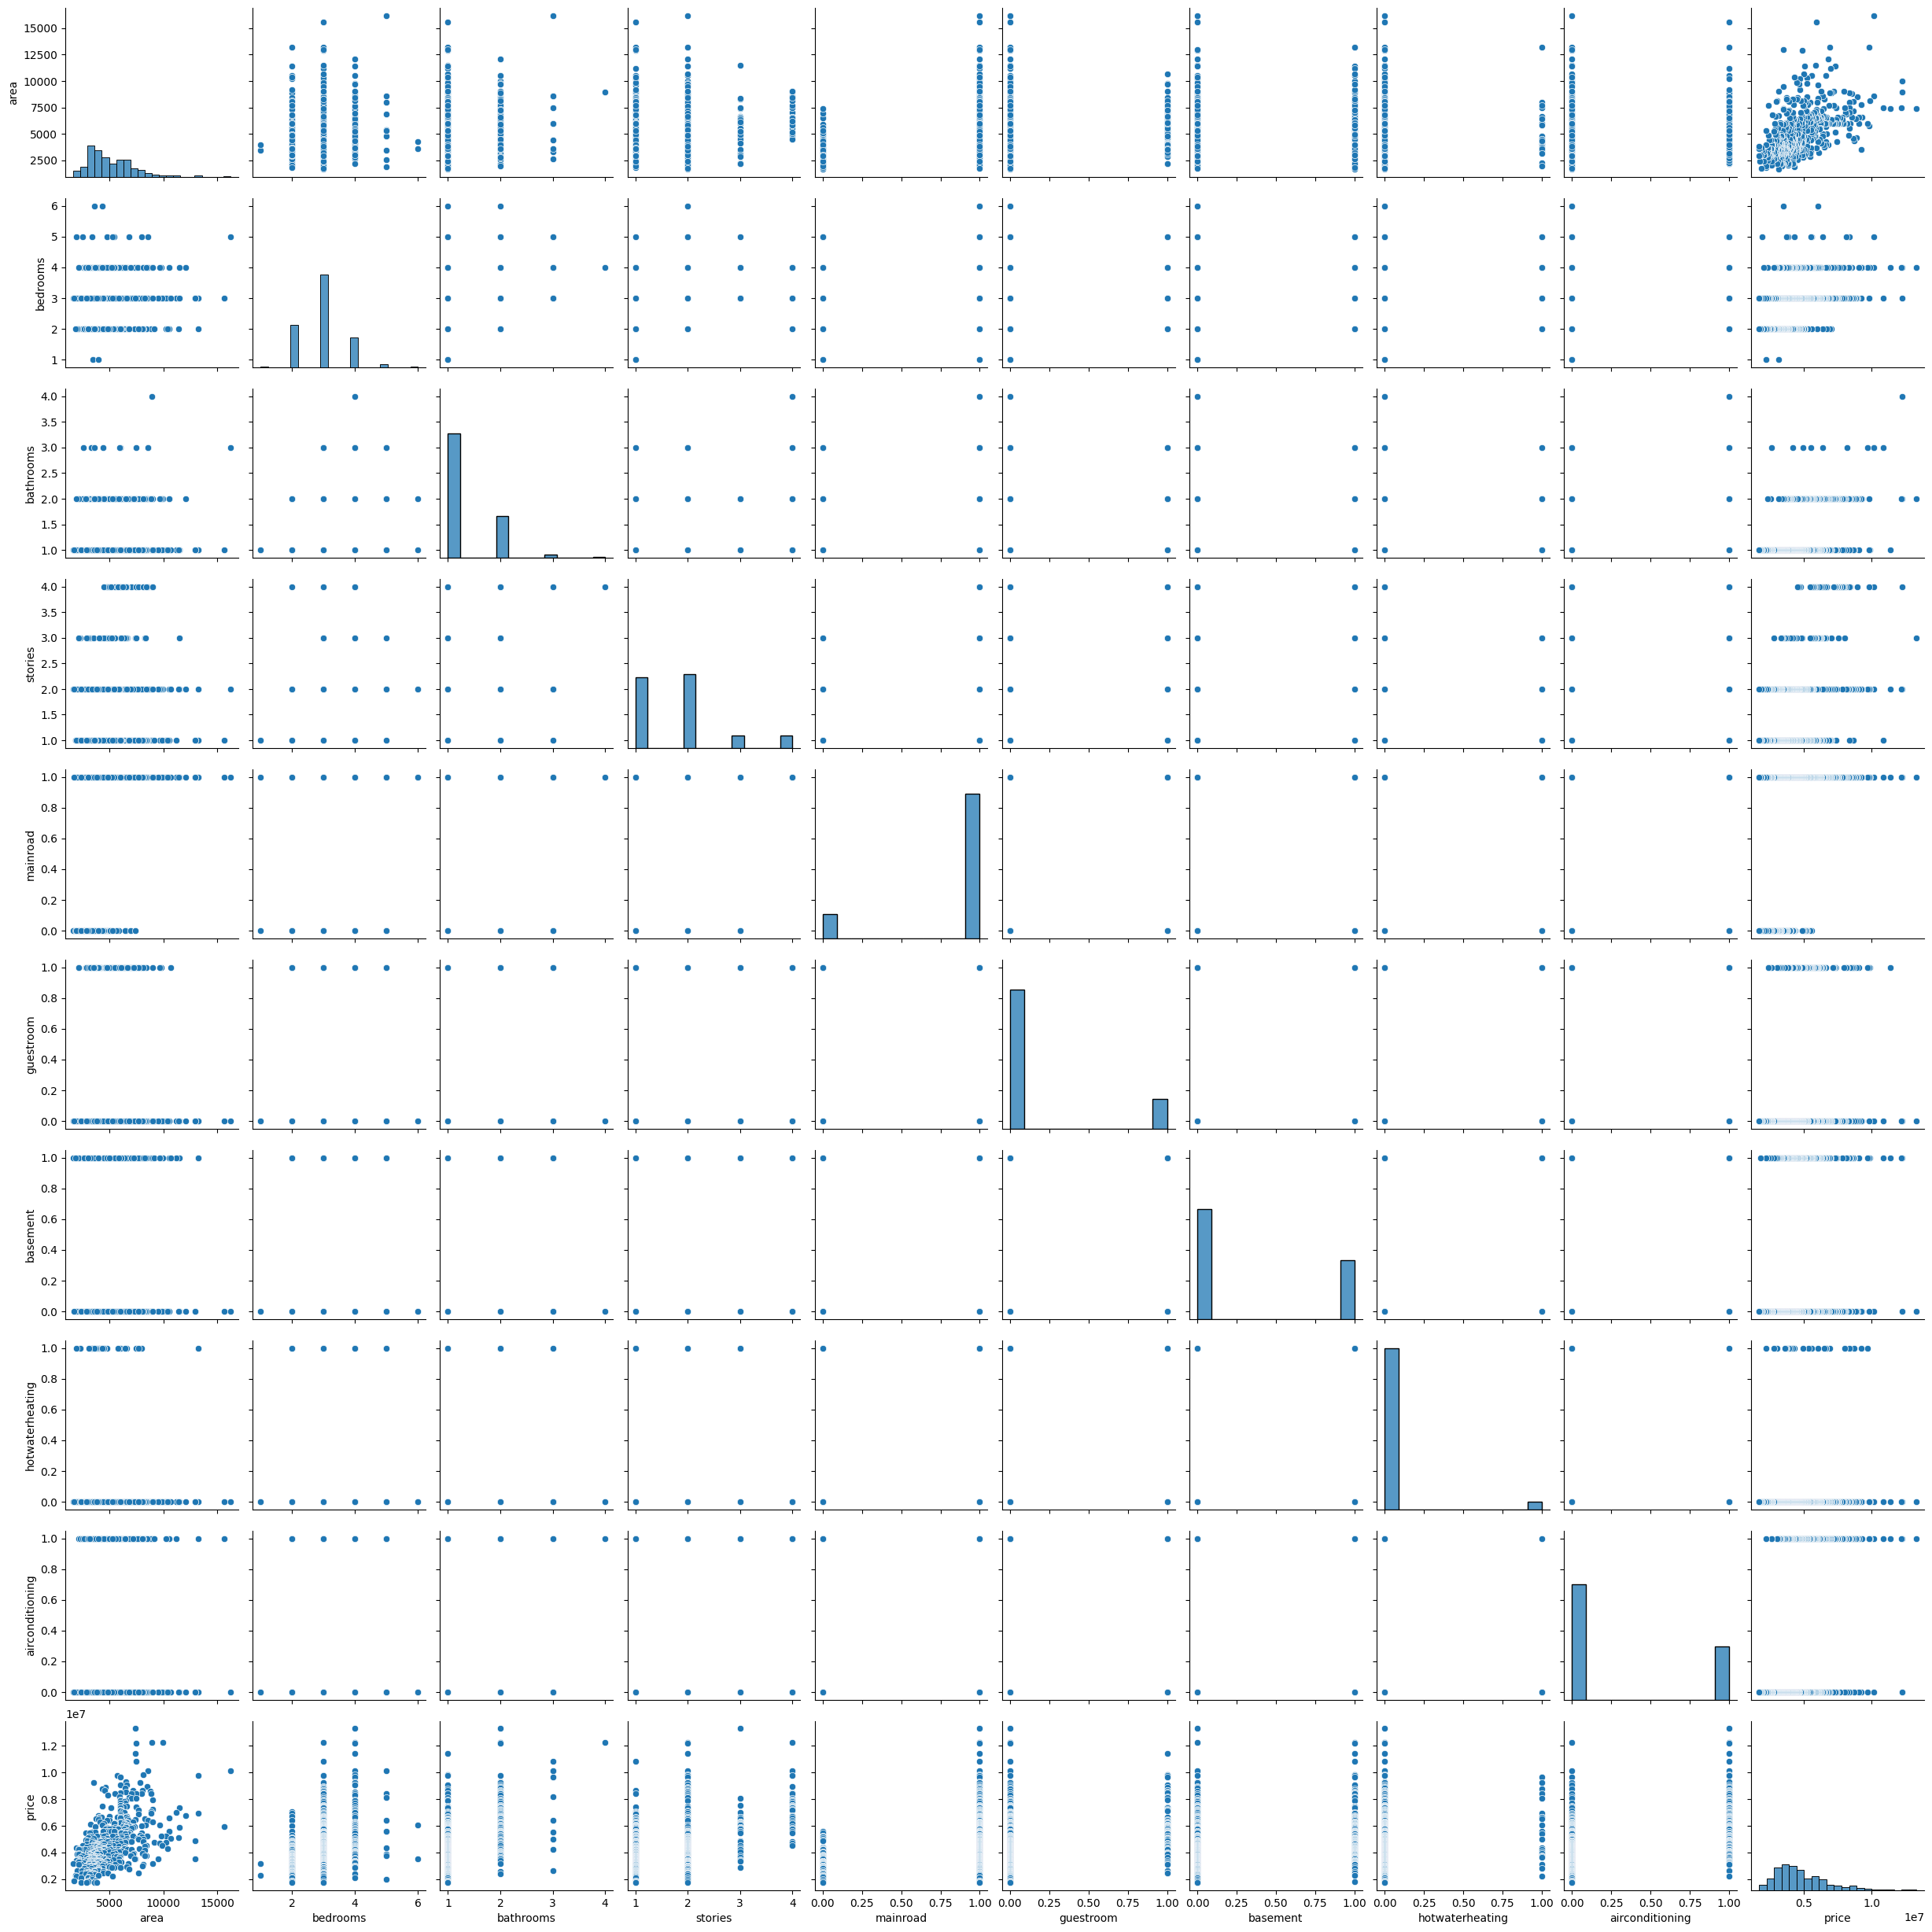

In [13]:


# Pairplot
sns.pairplot(df[features + ["price"]])
plt.show()
